In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Data set
fake_orders = pd.read_csv(r'C:\Users\Davi\Downloads\FAKE_ORDERS\fake_orders_test.csv')

In [21]:
# Exploracion de datos

fake_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [23]:
fake_orders.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,59:59.0,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,58:32.0,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,57:56.0,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,57:33.0,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,57:21.0,AR,34565,DeliveredStatus,PAID,2,2.86,6.48


In [25]:
fake_orders.describe()

,order_id,store_address,products,products_total,purchase_total_price
count,6.040000e+04,60400.000000,60400.000000,60400.000000,60400.000000
mean,3.278265e+07,41580.723692,2.811358,9.832693,10.703447
std,4.453627e+05,21905.784563,2.431214,9.276841,10.781632
min,3.150378e+07,190.000000,1.000000,0.000000,0.000000
25%,3.240091e+07,21110.000000,1.000000,4.110000,4.330000
50%,3.278110e+07,45849.000000,2.000000,7.120000,7.980000
75%,3.318279e+07,61992.250000,3.000000,12.750000,14.160000
max,3.356085e+07,75236.000000,39.000000,221.480000,265.760000


In [27]:
# Cálculo de pedidos subautorizados
fake_orders['subautorizado'] = fake_orders['products_total'] < fake_orders['purchase_total_price']

# Porcentaje de pedidos subautorizados
porcentaje_subautorizados = (fake_orders['subautorizado'].mean()) * 100
print(f"Porcentaje de pedidos subautorizados: {porcentaje_subautorizados:.2f}%")


Porcentaje de pedidos subautorizados: 57.58%


In [31]:
# Autorización incremental (+20%)
fake_orders['autorizacion_incremental'] = fake_orders['products_total'] * 1.20

# Verificación de autorización correcta con incremento
fake_orders['autorizado_incremental'] = fake_orders['autorizacion_incremental'] >= fake_orders['purchase_total_price']

# Porcentaje de pedidos autorizados con incremento
porcentaje_autorizados_incremental = (fake_orders['autorizado_incremental'].mean()) * 100
print(f"Porcentaje de pedidos autorizados con incremento: {porcentaje_autorizados_incremental:.2f}%")


Porcentaje de pedidos autorizados con incremento: 69.04%


country_code
AR    60.597332
BR    50.000000
CI    33.333333
CL    87.047101
CR    44.896116
DO    63.600000
EC    64.234450
EG    62.910284
ES    62.197407
FR    65.636704
GE    51.831502
GT    33.156966
IT    55.306268
KE    56.382979
MA    40.686275
PA    60.809477
PE    55.903866
PR    42.424242
PT    58.085809
RO    46.423627
TR    50.661626
UA    48.628308
UY    42.631579
Name: subautorizado, dtype: float64


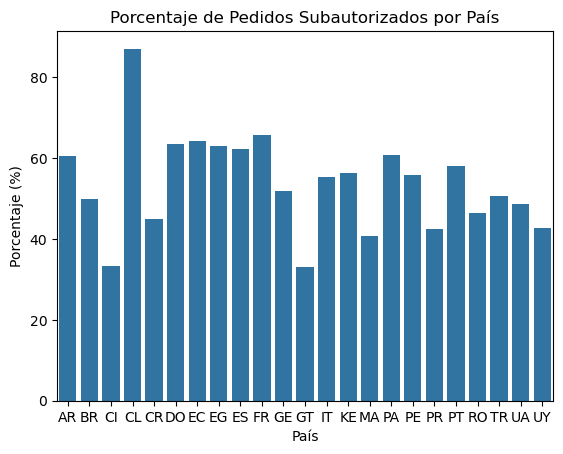

In [33]:
# Porcentaje de pedidos subautorizados por país
subautorizados_pais = fake_orders.groupby('country_code')['subautorizado'].mean() * 100
print(subautorizados_pais)

# Visualización de las diferencias por país
sns.barplot(x=subautorizados_pais.index, y=subautorizados_pais.values)
plt.title('Porcentaje de Pedidos Subautorizados por País')
plt.ylabel('Porcentaje (%)')
plt.xlabel('País')
plt.show()


In [35]:
# Pedidos fuera de la autorización incremental
pedidos_fuera_incremental = fake_orders[fake_orders['autorizado_incremental'] == False]

# Valores necesarios para capturar el monto restante
monto_restante = pedidos_fuera_incremental['purchase_total_price'] - pedidos_fuera_incremental['autorizacion_incremental']
print(monto_restante.describe())


count    1.870100e+04
mean     4.740313e+00
std      8.537180e+00
min      4.440892e-16
25%      9.740000e-01
50%      2.512000e+00
75%      5.380000e+00
max      2.641820e+02
dtype: float64


In [29]:
# Análisis de tiendas por número de pedidos subautorizados y valor monetario
tiendas_problemas = fake_orders[fake_orders['subautorizado']].groupby('store_address').agg({
    'order_id': 'count',
    'purchase_total_price': 'sum'
}).sort_values(by='purchase_total_price', ascending=False)

print(tiendas_problemas.head(10))


               order_id  purchase_total_price
store_address                                
28669               158               5832.25
28671               448               4536.10
28712               217               3575.47
12513               126               2933.10
14455               179               2924.07
27635               116               2169.30
4137                 82               2008.90
10264                59               1797.76
29451               101               1666.81
65898                66               1647.66


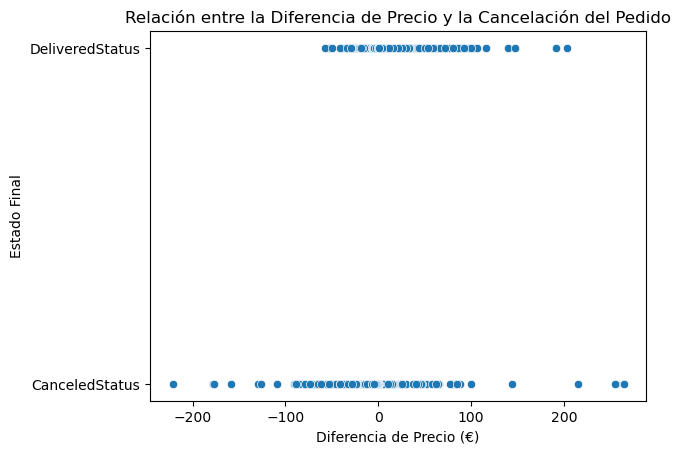

In [49]:
# Evaluar si hay más cancelaciones con mayor diferencia de precio
sns.scatterplot(x='diferencia_precio', y='final_status', data=fake_orders)
plt.title('Relación entre la Diferencia de Precio y la Cancelación del Pedido')
plt.xlabel('Diferencia de Precio (€)')
plt.ylabel('Estado Final')
plt.show()
